In [35]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
link='https://drive.google.com/open?id=1JpJis25voH1m9wWcgM2BzTTC_co2HSiT'
fluff, id = link.split('=')


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

#obtain CSV from drive
downloaded = drive.CreateFile({"id":id})
downloaded.GetContentFile('formatted_flights.csv')
flights = pd.read_csv('formatted_flights.csv')
flights.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


Text(0, 0.5, 'Flights')

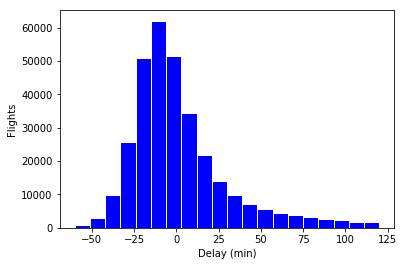

In [38]:
import seaborn as sns 

# matplotlib histogram
p = plt.hist(flights['arr_delay'], color ="blue",edgecolor='white', bins=int(100/5))
plt.xlabel('Delay (min)')
plt.ylabel("Flights")


          

Text(0, 0.5, 'Flights')

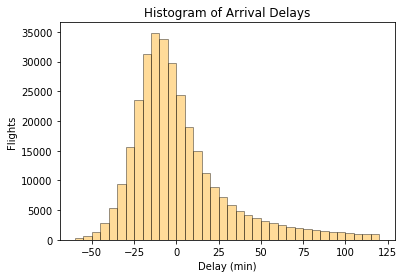

In [39]:
s = sns.distplot(flights["arr_delay"], color='orange', hist=True, kde=False, bins=int(180/5), hist_kws={'edgecolor':'black'})
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel("Flights")


**Show Plots with Different Bandwidth**

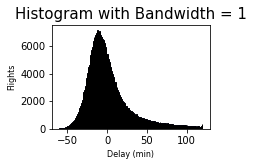

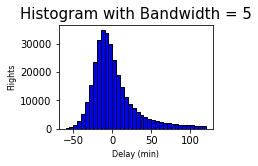

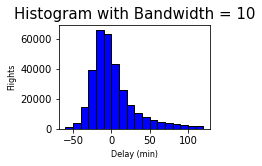

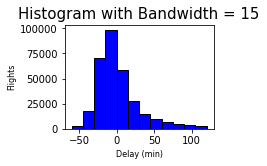

In [40]:
for i, binwidth in enumerate([1,5,10,15]):
  
  #set up the plot
  ax = plt.subplot(2,2,i+1)
  
  #draw the plot
  ax.hist(flights['arr_delay'], bins = int(180/binwidth), color='blue', edgecolor='black')
  
  #title and labels
  ax.set_title('Histogram with Bandwidth = %d' % binwidth, size=15)
  ax.set_xlabel('Delay (min)', size = 8)
  ax.set_ylabel('Flights', size=8)
  
  plt.tight_layout()
  plt.show()

# **Side by Side Histograms of the Delays from different airlines.**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

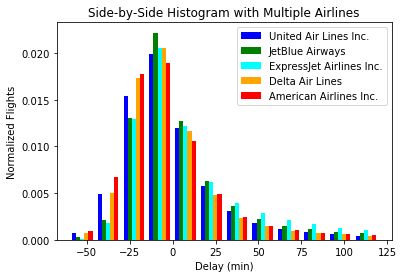

In [41]:
#extract delay times from each airline and put them in their own list 
x1 = list(flights[flights['name']=='United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name']=='JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name']=='ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name']=='Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name']=='American Airlines Inc.']['arr_delay'])

#assign colors for each airline and their names 
colors = ['blue', 'green', 'cyan', 'orange', 'red']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.', 'Delta Air Lines', "American Airlines Inc."]
#make a histogram using a list of list
#normalize the flights and assign colors and names 
plt.hist([x1,x2,x3,x4,x5], bins=int(180/15),
         normed=True, color=colors, label=names)

#plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title("Side-by-Side Histogram with Multiple Airlines")
         

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

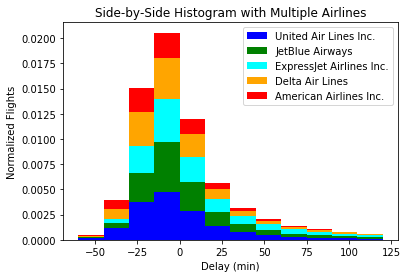

In [42]:
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names)
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title("Side-by-Side Histogram with Multiple Airlines")

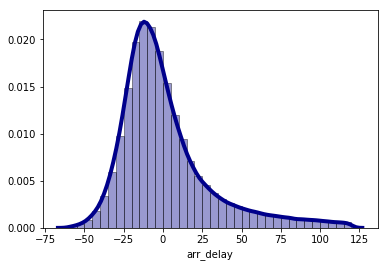

In [43]:
#Density Plot and Histogram of all arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Density')

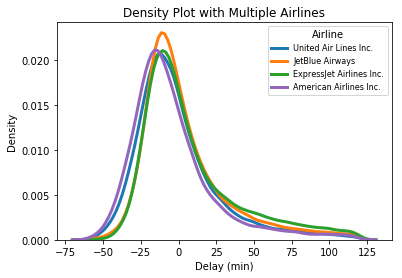

In [44]:
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.', 'Delta Air Lines', "American Airlines Inc."]

#Iterate through the five airlines
for airline in airlines:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  #dram the density plot
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'linewidth':3},
               label = airline)
#Plot formatting
plt.legend(prop = {'size':8}, title = 'Airline')
plt.title("Density Plot with Multiple Airlines")
plt.xlabel('Delay (min)')
plt.ylabel('Density')

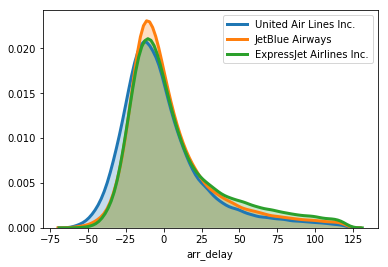

In [45]:
#shaded Density Plots
for airline in airlines[:3]:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

In [46]:
flights.name.unique()

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.'], dtype=object)

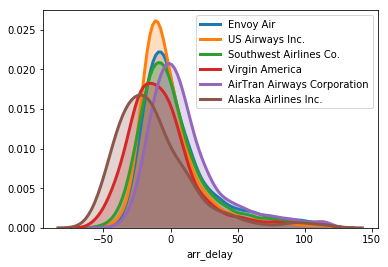

In [47]:
airlines2= ['Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.']
#shaded Density Plots
for airline in airlines2:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

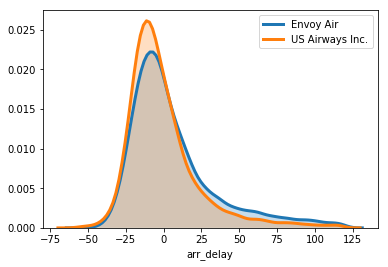

In [48]:
#shaded Density Plots
for airline in airlines2[:2]:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

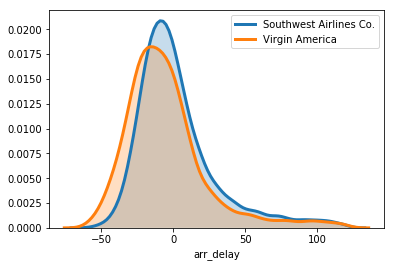

In [49]:
#shaded Density Plots
for airline in airlines2[2:4]:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

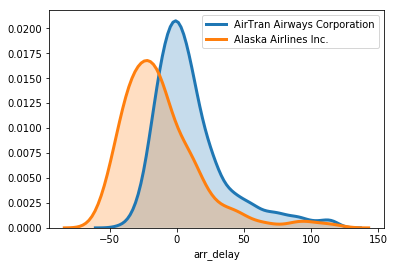

In [50]:
#shaded Density Plots
for airline in airlines2[4:]:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

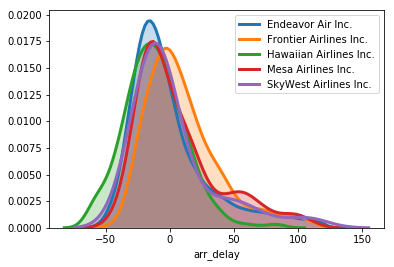

In [51]:
airline3=['Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.']
#shaded Density Plots
for airline in airline3:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

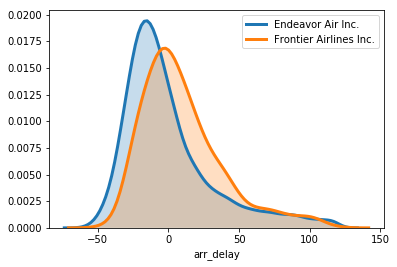

In [52]:

#shaded Density Plots
for airline in airline3[:2]:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

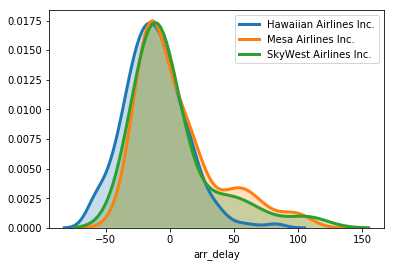

In [53]:

#shaded Density Plots
for airline in airline3[2:]:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

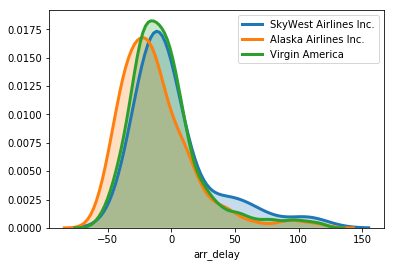

In [54]:
airline4=['SkyWest Airlines Inc.','Alaska Airlines Inc.','Virgin America' ]
for airline in airline4:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


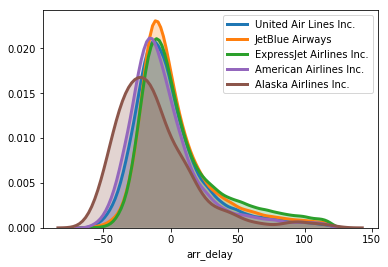

In [55]:
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.', 'Delta Air Lines', "American Airlines Inc.", 'Alaska Airlines Inc.']
for airline in airlines:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

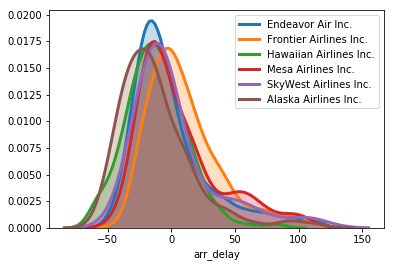

In [56]:
airline3=['Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.', 'Alaska Airlines Inc.']
for airline in airline3:
  #subset to the airline
  subset = flights[flights['name'] == airline]
  
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
               kde_kws = {'shade':True, 'linewidth':3},
               label = airline)

29.566533147645323

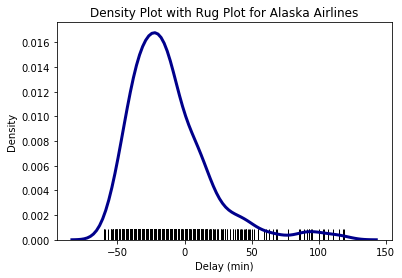

In [57]:
#Assign Subset
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

#Create a Density plot

sns.distplot(subset['arr_delay'], hist=False, kde=True, rug = True, 
            color= "darkblue",
            kde_kws = {'linewidth':3},
            rug_kws={'color':'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')
subset.shape
subset['arr_delay'].std()

31.999876308150938

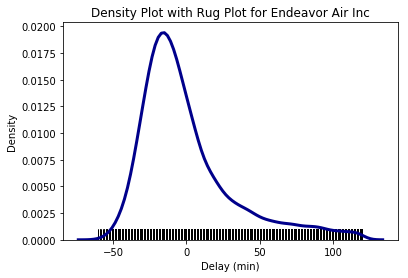

In [58]:
#same for endevor air
subset = flights[flights['name'] == 'Endeavor Air Inc.']

#Create a Density plot

sns.distplot(subset['arr_delay'], hist=False, kde=True, rug = True, 
            color= "darkblue",
            kde_kws = {'linewidth':3},
            rug_kws={'color':'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Endeavor Air Inc')
plt.xlabel('Delay (min)')
plt.ylabel('Density')
subset.shape
subset['arr_delay'].std()

28.257028674772755

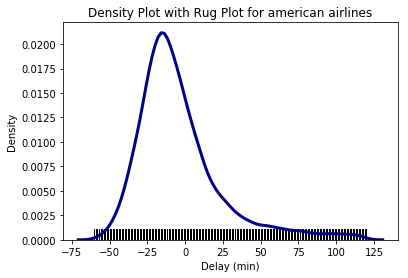

In [59]:
# and for american airlines
subset = flights[flights['name'] ==  "American Airlines Inc."]

#Create a Density plot

sns.distplot(subset['arr_delay'], hist=False, kde=True, rug = True, 
            color= "darkblue",
            kde_kws = {'linewidth':3},
            rug_kws={'color':'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for american airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')
subset.shape
subset['arr_delay'].std()

Text(0, 0.5, 'Density')

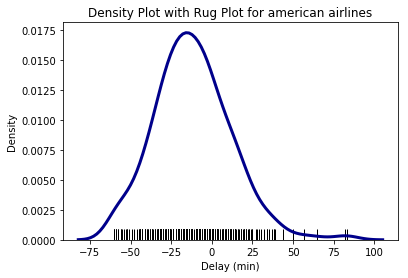

In [62]:
# and for american airlines
subset = flights[flights['name'] ==  'Hawaiian Airlines Inc.']

#Create a Density plot

sns.distplot(subset['arr_delay'], hist=False, kde=True, rug = True, 
            color= "darkblue",
            kde_kws = {'linewidth':3},
            rug_kws={'color':'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for american airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [63]:
names=['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.']

for name in names:
  airline = flights[flights["name"] == name]
  print("   ", name, " mean ", airline['arr_delay'].mean()," std ",  airline['arr_delay'].std(), " shape ",airline['arr_delay'].shape )
  
  

    United Air Lines Inc.  mean  -0.8054614169875264  std  28.096723442094575  shape  (56359,)
    American Airlines Inc.  mean  -3.9859601884796616  std  28.257028674772755  shape  (31197,)
    JetBlue Airways  mean  3.902175368779536  std  28.990324668748386  shape  (52267,)
    Delta Air Lines Inc.  mean  -3.24619092708961  std  26.723282906633525  shape  (46468,)
    ExpressJet Airlines Inc.  mean  7.548857959334717  std  32.121061394290834  shape  (48641,)
    Envoy Air  mean  5.816171332264562  std  28.647428488697045  shape  (24327,)
    US Airways Inc.  mean  -0.47106972937023583  std  23.943062758730406  shape  (19547,)
    Southwest Airlines Co.  mean  2.5223507076285814  std  28.084498145583957  shape  (11588,)
    Virgin America  mean  -5.178252032520326  std  28.641181442800406  shape  (4920,)
    AirTran Airways Corporation  mean  10.543859649122806  std  27.83771227491269  shape  (3021,)
    Alaska Airlines Inc.  mean  -11.878084179970973  std  29.566533147645323  shape 

# After ploting density plots for the different airlines' arrival delays, I selected Alaska Airlines as the airline most likely to get you to you destination on time.  After calculating the mean and std for all of the airlines, I reconsidered that statement and change my pick to Hawaiian Airline because although the mean arrival delay was slightly more than Alaska the standard deviation of Hawaiian Arilines was considerably lower, aprox. 20%,  than that of Alaska Airlines arrival delay.